# Students Exam Performance and Habits - Yuval raibi Python project

## Project Objective
The objective of this project is to analyze the impact of student habits—such as sleep, part-time work, and hobbies—on their exam performance.

### Research Questions:
- Do students who sleep more perform better on exams?
- Is there a correlation between working part-time and lower exam scores?
- Are there any patterns among students who perform exceptionally well or poorly?
- is there a correlation between mental health and lower grades?
- is there a correlation between diet quality, sleep hours, exresise frequancy and mental health rating?
- Does Gender influance on exam preformance?
- Does Parental Education Has an affect on students grades?

## Methods:
- Using **Pandas** for data manipulation
- Using **Matplotlib & Seaborn** for visualizing.
- **Performing statistical and categorical analysis** on students preformance.


In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Loading Data

 The DataBase name is : Student Habits vs Academic Performance


 from : https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance 
 (With minor modifications for this project)

In [411]:
Students = pd.read_csv("data/student_habits_performance.csv")

# General information

#### Dataset Summary:
##### The dataset contains student-level information aimed at analyzing the relationship between lifestyle factors and academic performance.

#### Columns:
- student_id: Unique identifier for each student.
- age: Student's age in years.
- gender: Gender of the student (Other, Male, Female).
- exam_date: Date of exam..
- study_hours_per_day: Average number of hours the student studies each day.
- social_media_hours: Average number of hours per day spent on social media.
- netflix_hours: Average number of hours per day spent watching Netflix.
- part_time_job: Whether the student has a part-time job (Yes/No).
- attendance_percentage: Class attendance rate (0–100%).
- sleep_hours: Average number of hours of sleep per day.
- diet_quality: Self-reported quality of diet.
- exercise_frequency: Frequency of physical exercise (e.g., days per week).
- parental_education_level: Education level of parents.
- internet_quality: Self-reported or measured quality of internet access.
- mental_health_rating: Self-rated mental health status.
- extracurricular_participation: Participation in extracurricular activities (Yes/No).
- exam_score: Final exam score (0–100 scale).

#### head- Display the first few rows
###### This helps to visually inspect the structure and values of the dataset.

In [412]:
Students.head()

,student_id,age,gender,exam_date,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1322,20,Male,02/04/2017,6.1,4.9,1.4,No,68.7,8.0,Good,0.0,Bachelor,Good,10.0,No,96.1
1,S1131,21,Female,12/11/2016,7.2,3.7,0.0,No,100.0,7.8,Good,6.0,Bachelor,Good,NaN,No,100.0
2,S1605,19,Male,20/12/2019,2.2,3.5,1.8,No,100.0,5.5,Good,3.0,Bachelor,Good,5.0,No,67.6
3,S1074,21,Female,25/09/2016,2.3,1.0,0.4,No,100.0,6.4,Fair,3.0,NaN,Good,5.0,No,66.9
4,S1534,19,Male,18/05/2017,3.7,2.9,2.8,Yes,100.0,6.5,Good,6.0,Bachelor,Average,10.0,No,82.5


#### columns- View all column names
###### To ensure we understand which fields we’re working with for future transformations and analysis

In [413]:
Students.columns

Index(['student_id', 'age ', '  gender', 'exam_date', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours ', 'diet_quality',
       ' exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


#### info -Check the structure and data types
###### This provides insights into data types, missing values, and helps us plan preprocessing

In [414]:
Students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2     gender                       1000 non-null   object 
 3   exam_date                      1000 non-null   object 
 4   study_hours_per_day            1000 non-null   float64
 5   social_media_hours             1000 non-null   float64
 6   netflix_hours                  1000 non-null   float64
 7   part_time_job                  1000 non-null   object 
 8   attendance_percentage          1000 non-null   float64
 9   sleep_hours                    1000 non-null   float64
 10  diet_quality                   1000 non-null   object 
 11   exercise_frequency            1000 non-null   float64
 12  parental_education_level       909 non-null    ob

#### Observations:
  1. [exam date] - is not in date format as it should be.
  2. some Columns have whitespace characters.
  3. [mental_health_rating] - needs to be Int NOT Float64
#####

#### isnull-This provides insights into missing values

In [415]:
print(Students.isnull().sum())

student_id                         0
age                                0
  gender                           0
exam_date                          0
study_hours_per_day                0
social_media_hours                 0
netflix_hours                      0
part_time_job                      0
attendance_percentage              0
sleep_hours                        0
diet_quality                       0
 exercise_frequency                0
parental_education_level          91
internet_quality                   0
mental_health_rating             188
extracurricular_participation      0
exam_score                         0
dtype: int64


#### Observations:
 1. [parental_education_level] - has only 909 values instead of 1000(91 nulls)
 2. [mental_health_rating] - has only 803 values instead of 1000(188 nulls).

#### Describe -Descriptive statistics for categorical data: shows count, number of unique values, most frequent value, and its frequency

In [416]:
Students.describe(include = object)

,student_id,gender,exam_date,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,909,1000,1000
unique,1000,5,257,2,3,3,3,4
top,S1058,Female,01/10/2017,No,Fair,Bachelor,Good,No
freq,1,477,8,713,437,428,447,591


#### Observations:
 - student_id: All 1000 values are unique, as expected for identifiers.
 - gender: There are 5 unique values, with 'Female' being the most frequent (477 occurrences).
            - should be only 3 values ("Female","Male","Other") - **Needs Cleaning!**
 - extracurricular_participation: Binary column, most students (591) do **not** participate.
            - should be only 2 values [Yes/No] - HAS 4 Unique values -**Needs Cleaning!**
###

# Cleaning And Fixing Data

#### Remove leading and trailing whitespace characters from column names

In [417]:
Students.columns = Students.columns.str.strip()

#### Fixing [exam_date] to date format

In [418]:
Students["exam_date"] = pd.to_datetime(Students["exam_date"],format = "%d/%m/%Y",dayfirst=True)

#### Finding Missing Data in [parental_education_level] and filling with "No Information"

In [425]:
Missing_data = Students["parental_education_level"].isnull().sum()

In [426]:
print(f"The number of null data in parental_education_level is: {Missing_data}")

The number of null data in parental_education_level is: 0


In [421]:
Students["parental_education_level"] = Students["parental_education_level"].fillna("No Information")

In [422]:
# Checking if the Fillna Command worked 

In [423]:
Students[Students["parental_education_level"] =="No Information"]

,student_id,age,gender,exam_date,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
3,S1074,21,Female,2016-09-25,2.3,1.0,0.4,No,100.0,6.4,Fair,3.0,No Information,Good,5.0,No,66.9
11,S1872,18,Female,2018-11-10,4.2,3.0,1.5,No,100.0,6.0,Fair,3.0,No Information,Average,8.0,No,78.4
12,S1180,21,Female,2019-04-15,3.7,3.3,2.6,Yes,100.0,7.5,Fair,5.0,No Information,Good,NaN,No,69.2
23,S1539,18,Male,2018-03-03,3.8,4.1,1.6,No,100.0,7.2,Good,4.0,No Information,Good,6.0,Yes,81.0
29,S1214,19,Male,2018-08-20,5.7,3.8,0.0,No,100.0,8.8,Fair,3.0,No Information,Average,NaN,No,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,S1502,21,Female,2018-03-08,0.3,3.2,4.0,No,40.5,4.0,Poor,1.0,No Information,Average,4.0,Yes,34.0
952,S1766,21,Male,2018-12-19,0.0,4.0,4.0,Yes,40.5,3.8,Poor,3.0,No Information,Average,NaN,No,30.5
965,S1480,20,Male,2018-10-04,3.5,4.7,1.3,Yes,40.0,5.0,Good,3.0,No Information,Good,4.0,No,55.9
994,S1899,19,Female,2016-01-01,3.8,2.0,1.5,No,30.0,5.1,Poor,0.0,No Information,Average,4.0,No,55.7


#### Finding & Filling missing values in [mental_health_rating]  

##### Method -Using the average value calculated based on related fields: [sleep_hours] and [exercise_frequency].

In [427]:
Missing_mental_health_rating = Students["mental_health_rating"].isnull()
Missing_mental_health_rating_sum = Students["mental_health_rating"].isnull().sum()
print(f"Total missing data in mental_health_rating: {Missing_mental_health_rating_sum}")

Total missing data in mental_health_rating: 188


In [428]:
# Finding the Average value calculated based on CHOSEN fields: [sleep_hours] and [exercise_frequency].

In [429]:
missing_data_for_calculation = Students[["sleep_hours","exercise_frequency","mental_health_rating"]][Missing_mental_health_rating]

In [430]:
missing_data_for_calculation.describe()

,sleep_hours,exercise_frequency,mental_health_rating
count,188.000000,188.000000,0.0
mean,6.494149,3.228723,NaN
std,1.547300,1.930843,NaN
min,2.500000,0.000000,NaN
25%,5.500000,1.000000,NaN
50%,6.600000,4.000000,NaN
75%,7.700000,5.000000,NaN
max,9.700000,6.000000,NaN


#### Observations:
##### in the Describe Command  we can see that in our Null fields in [mental_health_rating]
    - [sleep_hours] - variets between min 2.5 and max 9.7 with Average of 6.5
    - [exercise_frequency] - varients between min 0 and max 6 with Average of 3.2 

In [431]:
mean_sleep_exrecise = Students.query(
    "sleep_hours >= 2.5 and sleep_hours <= 9.7 and "
    "exercise_frequency >= 0 and exercise_frequency <= 6 and "
    "mental_health_rating > 0"
).mental_health_rating.mean()
print(f"The Avg OF mental_health_rating according to exercise_frequency& sleep_hours is: {mean_sleep_exrecise:.2f}")

The Avg OF mental_health_rating according to exercise_frequency& sleep_hours is: 6.02


#### searching the mean of mean_sleep_exrecise is the Average Found in cases where :
    - [sleep_hours] - variets between min 2.5 and max 9.7 with Average of 6.5
    - [exercise_frequency] - varients between min 0 and max 6 with Average of 3.2 
    - [mental_health_rating] - NOT null.(mental_health_rating >0)

In [433]:
# Filling The null values in [mental_health_rating] with the Average found in the previus line

In [434]:
Students["mental_health_rating"] = Students["mental_health_rating"].fillna(mean_sleep_exrecise)

#### Fixing [mental_health_rating] - to Int64 Data Type

In [435]:
# Step 1- finding the Wrong values in the column [mental_health_rating]

In [436]:
fixing_mental_health_rating = Students.query("mental_health_rating % 1 != 0 and mental_health_rating.notnull()")

In [437]:
# step 2- fixing values found 

In [438]:
Students.loc[fixing_mental_health_rating.index, 'mental_health_rating'] = \
    fixing_mental_health_rating['mental_health_rating'].round().astype('Int64')

In [439]:
# Step 3 - changing the Column Type

In [440]:
Students['mental_health_rating'] = Students['mental_health_rating'].astype('Int64')

#### [Gender] has 5 types - Finding problematic data and Replacing it
##### should be only 3 values ("Female","Male","Other") - Needs Cleaning!

In [441]:
# Step 1 - Using Unique - We can see we have 5 unique values instead of 3 

In [447]:
Students['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [443]:
# Step 2-Finding The lines containing Values that are not in our normal values ["Female","Male","Other"] using ~isin()

In [444]:
Students_gender = ~Students["gender"].isin(["Female","Male","Other"])

In [445]:
# Step 3 - Replacing the Wrong values ['m','f']

In [446]:
Students['gender'] = Students['gender'].replace(['m','f'], ['Male','Female'])

#### [Extracurricular_participation]: should be only 2 values [Yes/No] - HAS 4 Unique values -Needs Cleaning!

In [448]:
# Step 1 - Using Unique - We can see we have 4 unique values instead of 2

In [449]:
Students['extracurricular_participation'].unique()

array(['No', 'Yes', 'n', 'y'], dtype=object)

In [450]:
# Step 2 -Finding The lines containing Values that are not in our normal values ['Yes', 'No] using ~isin()

In [454]:
mask = Students["extracurricular_participation"].isin(['Yes', 'No'])
Students_extracurricular_participation = Students[~mask]
Students_extracurricular_participation['extracurricular_participation'].value_counts()

Series([], Name: count, dtype: int64)

In [455]:
# Step 3 - Replacing the Wrong values ['n', 'y']

In [456]:
Students['extracurricular_participation'] = Students['extracurricular_participation'].replace(['n','y'], ['No','Yes'])

#### Creating new Columns from [exam_date]

In [457]:
Students['exam_month'] = Students['exam_date'].dt.month
Students['exam_year'] = Students['exam_date'].dt.year
Students['exam_day'] = Students['exam_date'].dt.day_name()

# Analyzing the Data

#### Describe -View basic statistical summary
##### Includes mean, standard deviation, min/max values – as required in the descriptive statistics section.


In [458]:
Students.describe()

,age,exam_date,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,exam_month,exam_year
count,1000.0000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.00000,1000.000000,1000.000000
mean,20.4980,2018-01-26 11:25:26.400000,3.607700,2.488400,1.943000,78.004000,6.189000,2.904200,6.02,70.07330,6.627000,2017.564000
min,17.0000,2016-01-01 00:00:00,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,1.0,18.40000,1.000000,2016.000000
25%,18.7500,2017-02-28 00:00:00,2.600000,1.800000,1.200000,72.300000,5.175000,1.000000,5.0,59.27500,4.000000,2017.000000
50%,20.0000,2018-02-15 12:00:00,3.500000,2.500000,1.900000,83.100000,6.400000,3.000000,6.0,70.70000,7.000000,2018.000000
75%,23.0000,2019-01-06 00:00:00,4.500000,3.200000,2.600000,90.025000,7.500000,4.000000,7.0,81.90000,10.000000,2019.000000
max,24.0000,2019-12-21 00:00:00,8.300000,7.200000,6.500000,100.000000,10.000000,6.000000,10.0,100.00000,12.000000,2019.000000
std,2.3081,NaN,1.402012,1.108681,1.119707,17.597368,1.604342,1.849292,2.001901,16.81602,3.448734,1.101416


##### Observations:
 - Age: The students' ages range from 17 to 24, with an average of 20.5 years.
 - Study Hours: On average, students study 3.6 hours per day, with a wide range up to 8.3 hours.
 - Social Media & Netflix: Students spend about 2.5 hours on social media and 1.9 on Netflix daily On Average.
 - Attendance: The average attendance is 78%, with some students as low as 15% and others with perfect (100%).
 - Sleep Hours: The average is around 6.2 hours, with some students reporting as low as 2 hours.
 - Exercise Frequency: Ranges from 0 to 6 times per week, average is 2.9.
 - Mental Health Rating: Distributed from 1 to 10, average around 6.
 - Exam Score: Exam scores range from 18.4 to 100, with a Average of 70.1 and a standard deviation of 6.8.

#### Correlation in heatmap and in table of the data inside students data


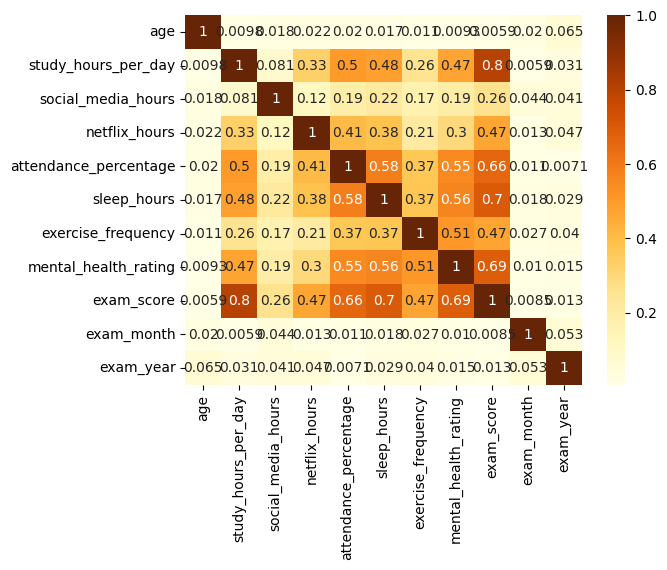

In [462]:
sb.heatmap(Students.corr(numeric_only=True).abs(),cmap="YlOrBr", annot=True)
plt.show()

In [460]:
Students.corr(numeric_only = True)

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,exam_month,exam_year
age,1.000000,0.009795,-0.018394,0.022033,-0.019879,-0.016550,0.011142,0.009324,0.005888,-0.019523,-0.064526
study_hours_per_day,0.009795,1.000000,-0.081445,-0.329102,0.500339,0.480302,0.257229,0.471434,0.802322,-0.005906,-0.031337
social_media_hours,-0.018394,-0.081445,1.000000,0.119645,-0.189749,-0.215686,-0.168522,-0.194280,-0.260657,-0.044382,0.041268
netflix_hours,0.022033,-0.329102,0.119645,1.000000,-0.408345,-0.379777,-0.214281,-0.295699,-0.466391,0.013179,0.047440
attendance_percentage,-0.019879,0.500339,-0.189749,-0.408345,1.000000,0.580939,0.366867,0.547201,0.655710,0.011049,0.007140
sleep_hours,-0.016550,0.480302,-0.215686,-0.379777,0.580939,1.000000,0.374781,0.562446,0.698180,-0.017785,-0.029285
exercise_frequency,0.011142,0.257229,-0.168522,-0.214281,0.366867,0.374781,1.000000,0.508035,0.469499,-0.026860,0.039724
mental_health_rating,0.009324,0.471434,-0.194280,-0.295699,0.547201,0.562446,0.508035,1.000000,0.687529,-0.010082,-0.014655
exam_score,0.005888,0.802322,-0.260657,-0.466391,0.655710,0.698180,0.469499,0.687529,1.000000,0.008524,-0.012800
exam_month,-0.019523,-0.005906,-0.044382,0.013179,0.011049,-0.017785,-0.026860,-0.010082,0.008524,1.000000,0.052803


#### Observations: 
 1. There is a strong positive correlation between **study_hours_per_day** and **exam_score** (r= 0.8) - This suggests that students who study more hours per day tend to achieve higher exam scores.
2. There is a medium positive correlation between **sleep_hours** and **exam_score** (r= 0.7) - This might indicate that students who get more sleep have better chances of getting higher scores.
3. There is a medium positive correlation between **sleep_hours** and **mental_health_rating** (r= 0.56), as well as between **sleep_hours** and **attendance_percentage** (r = 0.58) - This suggests that students who sleep more tend to have better mental health and are more likely to attend classes regularly.
4. There is a medium positive correlation between **study_hours_per_day** and **attendance_percentage** (r= 0.50) - This indicates that students who study more also tend to have higher attendance rates, which may contribute to their academic success.

#### Describe -Descriptive statistics for categorical data: shows count, number of unique values, most frequent value, and its frequency

In [463]:
Students.describe(include = object)

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation,exam_day
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,2,3,4,3,2,7
top,S1058,Female,No,Fair,Bachelor,Good,No,Wednesday
freq,1,481,713,437,428,447,600,188


#### Pairplot of all the numeric values in the dataset

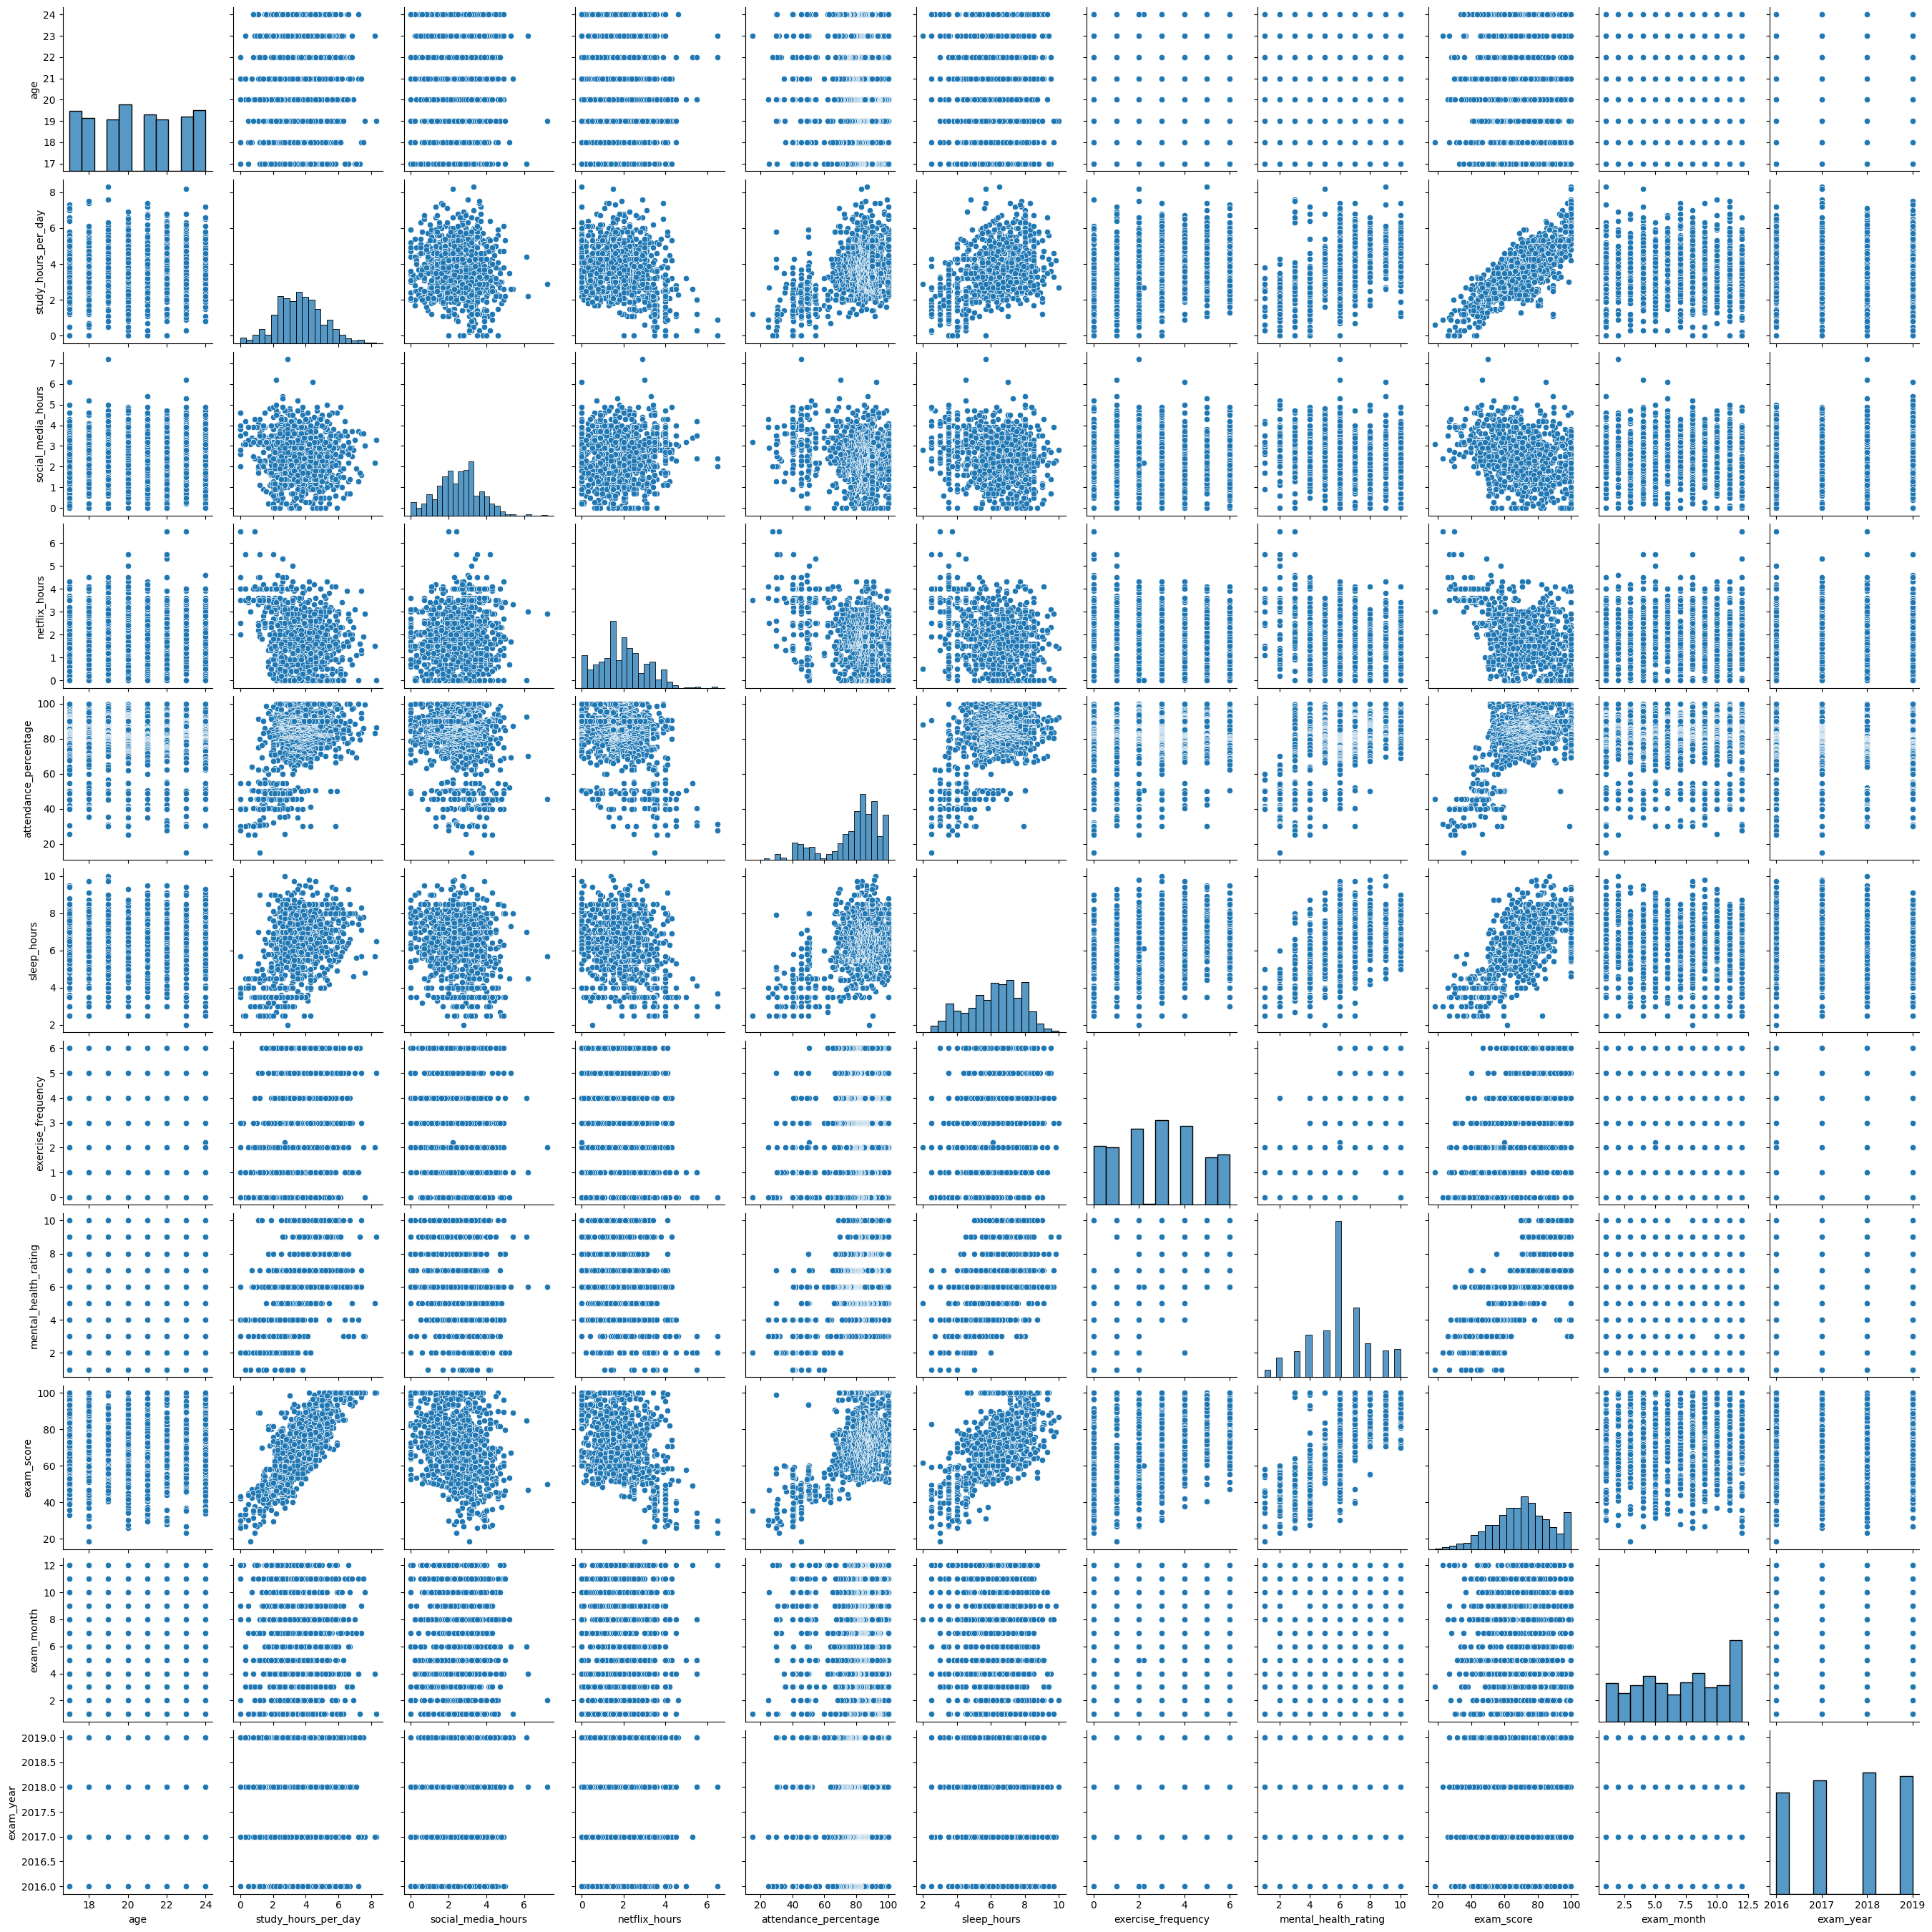

In [464]:
sb.pairplot(Students)
plt.show()

#####
#### Pair Plot - Comparison of Student exam_score vs ['sleep_hours','attendance_precentage','mental_health_rating']


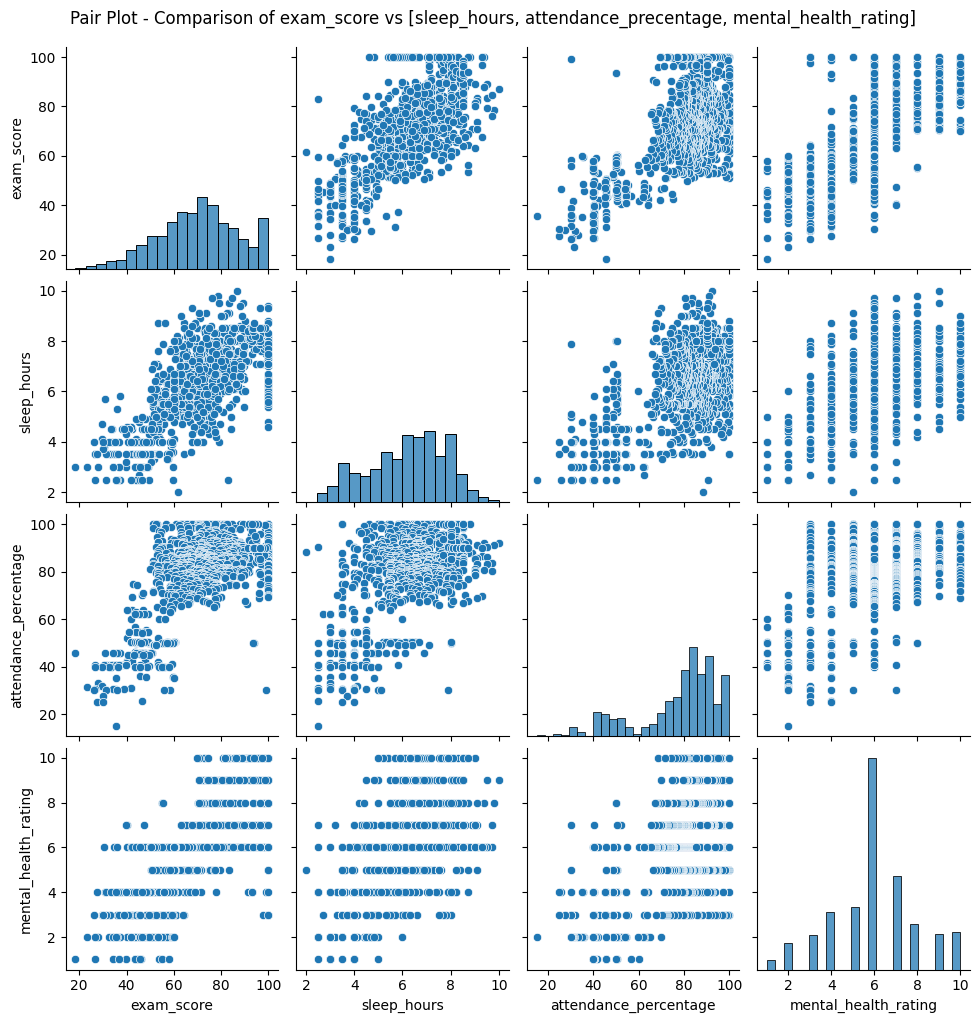

In [466]:
sb.pairplot(Students[['exam_score','sleep_hours','attendance_percentage','mental_health_rating']])
plt.suptitle('Pair Plot - Comparison of exam_score vs [sleep_hours, attendance_precentage, mental_health_rating]', y=1.02)
plt.show()

#### Observations:
 1. [attendance_percentage] vs [sleep_hours] - Students who sleep more hours tend to have higher attendance records.
 2. [attendance_percentage] vs [exam_score] - Students that have higher attendance precentage tend to achieve higher exam_score. 


#####
#### Pairplot of ['study_hours_per_day','exam_score']

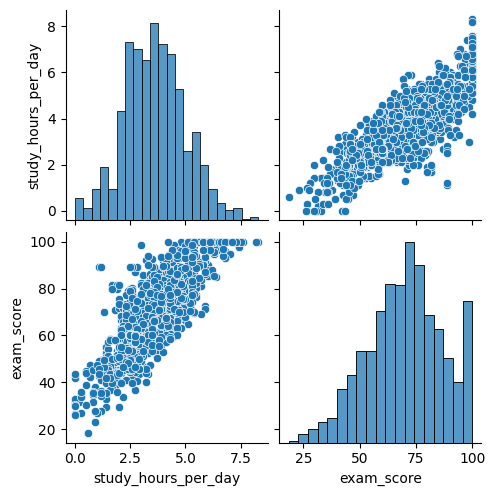

In [467]:
sb.pairplot(Students[['study_hours_per_day','exam_score']])
plt.show()

#### Observation:
- Students who study more hours tend to achieve higher exam score
- there are some outliers where study hours are low (smaller than 2) and exam score is high (over 80) 

##### Cheching the ouliers found Above

In [468]:
study_hours_per_day_outliers =Students.query("study_hours_per_day <=2 and exam_score >=80 and exam_score <=100")
study_hours_per_day_outliers

,student_id,age,gender,exam_date,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,exam_month,exam_year,exam_day
125,S1308,24,Male,2018-12-24,1.7,3.3,1.3,No,94.7,8.5,Fair,6.0,Master,Good,6,Yes,81.5,12,2018,Monday
204,S1986,20,Male,2016-03-26,1.1,1.7,2.2,No,91.4,7.0,Poor,5.0,Master,Poor,10,No,89.0,3,2016,Saturday
205,S1576,21,Male,2018-06-06,1.9,2.1,1.3,No,91.4,6.5,Fair,3.0,High School,Good,10,No,81.5,6,2018,Wednesday
424,S1484,21,Female,2017-01-06,1.9,1.2,0.9,No,85.3,9.0,Fair,2.0,Bachelor,Good,7,Yes,80.0,1,2017,Friday
490,S1966,21,Other,2018-04-27,1.7,0.2,0.8,No,83.5,7.0,Poor,2.0,High School,Good,8,Yes,80.0,4,2018,Friday
550,S1953,20,Female,2017-05-05,2.0,1.0,0.1,Yes,81.5,6.4,Fair,5.0,High School,Average,7,No,81.5,5,2017,Friday
604,S1451,22,Female,2018-02-16,1.2,1.1,1.9,No,80.0,9.0,Poor,4.0,Master,Poor,7,No,89.0,2,2018,Friday


#### Conclusion: 
- Although these data points are considered outliers, they represent real cases of students who performed well despite studying very little. Therefore, I chose to retain them in the analysis.

#### A histplot of exam score

In [469]:
Students.exam_score.mean()

np.float64(70.0733)

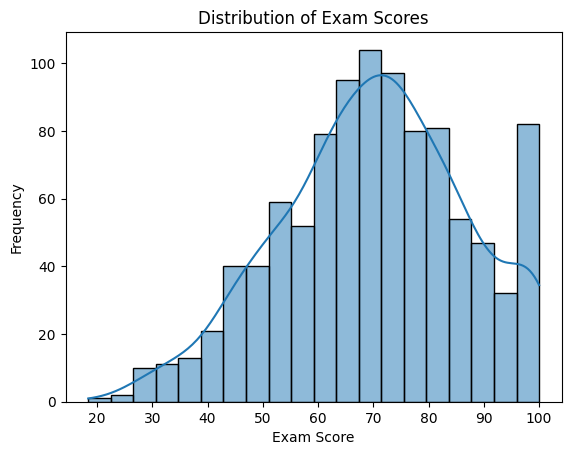

In [470]:
sb.histplot(Students['exam_score'], bins=20, kde=True)
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

#### Observation:
 - we can see that most of the data is between 60-80 , near the Average (70%)
 - we have small amount of data in the range of 20-60

#### Pie chart of parental_education_level 


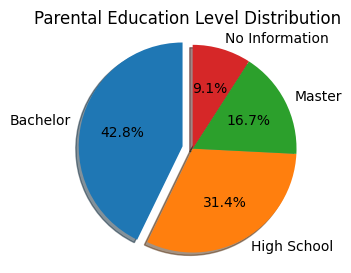

In [471]:
edu_counts = Students['parental_education_level'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', startangle=90,explode=(0.1,0,0,0),shadow=True)
plt.title("Parental Education Level Distribution")
plt.axis('equal')
plt.show()

#### Observation:
- we have 4 categories
- most of the data is in ["Bachelor"] = 42.8 %

# Grouping

#### Does Students who maintain a part_time_job has  smaller Average than Students who dont work and  does the gender has an influance ?

In [472]:
Students.groupby('part_time_job',observed=True)["exam_score"].mean().sort_values(ascending=False)

part_time_job
No     71.709116
Yes    66.009408
Name: exam_score, dtype: float64

In [473]:
Students.groupby(['part_time_job','gender'],observed=True)["exam_score"].mean().sort_values(ascending=False).unstack()

gender,Female,Male,Other
part_time_job,,,
No,71.586364,71.721515,72.970968
Yes,66.845736,65.257823,66.245455


#### Conclusion: 
- Students with part-time jobs tend to have lower average exam scores compared to those who do not work.
- Gender does not appear to affect the average exam score, regardless of whether the student has a part-time job or not.

#### Does Students with extracurricular_participation achieve higher score in Average?

In [474]:
Students.groupby('extracurricular_participation')[['exam_score']].describe()

exam_score                                      \
                                   count       mean        std   min     25%   
extracurricular_participation                                                  
No                                 600.0  68.240167  16.419772  18.4  57.600   
Yes                                400.0  72.823000  17.047733  26.8  61.575   

                                                    
                                50%     75%    max  
extracurricular_participation                       
No                             68.2  79.050  100.0  
Yes                            74.0  85.325  100.0

#### Conclusion: 
- Students with extracurricular participation tend to have higher average exam scores compared to those who do not have extracurricular participation.

#### Does age and gender has an influance on exam scores?

In [475]:
# comparing average exam score by age and gender

In [476]:
Avg_Age_vs_gender = Students.groupby(['age','gender'])['exam_score'].mean().unstack(level = 0)
Avg_Age_vs_gender

age,17,18,19,20,21,22,23,24
gender,,,,,,,,
Female,71.679310,72.540678,68.909836,71.525676,69.798413,70.160000,69.301961,68.118182
Male,69.998551,68.961111,67.863265,69.240000,67.060000,69.545098,72.335484,71.686111
Other,64.200000,78.400000,62.800000,66.285714,71.071429,67.850000,81.300000,74.085714


In [477]:
# The Average Found in ages 17-22 by gender.

In [478]:
age_17_22 = Students[(Students['age'] >= 17) & (Students['age'] <= 22)]
avg_score_by_gender_age_17_22 = age_17_22.groupby('gender')['exam_score'].mean().reset_index()
avg_score_by_gender_age_17_22

,gender,exam_score
0,Female,70.774933
1,Male,68.847813
2,Other,68.427586


In [479]:
# The Average Found in ages 23-24 by gender.

In [480]:
age_23_more = Students[(Students['age'] >= 23)]
avg_score_by_gender_age_23_more = age_23_more.groupby('gender')['exam_score'].mean().reset_index()
avg_score_by_gender_age_23_more

,gender,exam_score
0,Female,68.687736
1,Male,71.986567
2,Other,77.415385


#### Conclusion: 
- Female Students tend to have higher Average grades (Average = 70.7) than the Male Students (Average = 68.8) from ages 17-22.
- Male Students tend to have higher Average (Average =72) the Female Students (Average =68.7)from ages 23-24.

# Visualization

#### Distribution of Students Taking Exams Each Month by gender

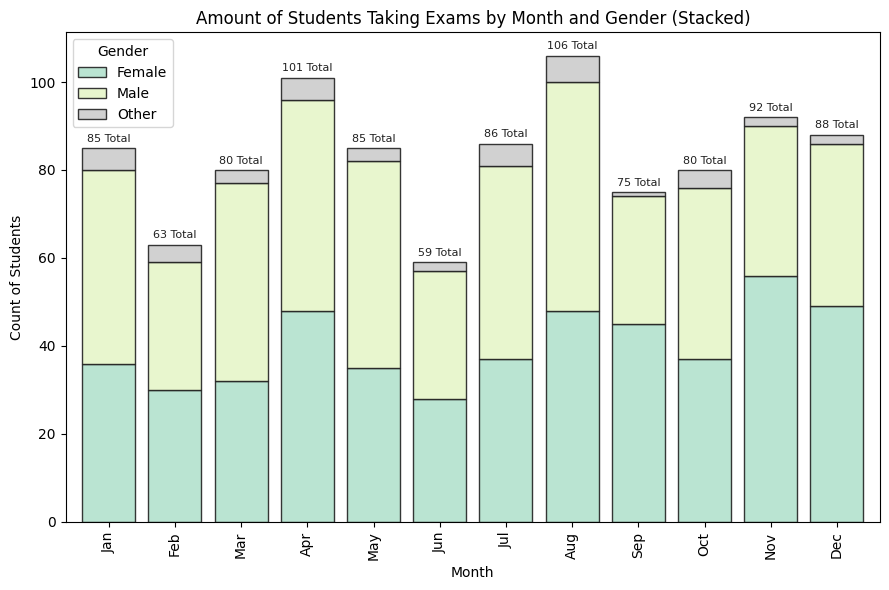

In [481]:
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_gender_counts = Students.groupby(['exam_month','gender'])['student_id'].count().unstack(fill_value =0)
monthly_gender_counts.index = monthly_gender_counts.index.map(month_map)

monthly_gender_counts.plot(kind='bar',stacked=True,figsize=(9, 6),cmap="Pastel2",edgecolor='#212121',alpha=0.9,width=0.8)
for i, j in enumerate(monthly_count.values): # Adds values to the bars
    plt.text(i, j + 1, str(j)+' Total', ha='center', va='bottom', fontsize=8, color='#212121')

plt.title('Amount of Students Taking Exams by Month and Gender (Stacked)')
plt.xlabel('Month')
plt.ylabel('Count of Students')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [483]:
# a table of the data:

In [484]:
monthly_gender_counts = Students.groupby(['exam_month','gender'])['student_id'].count().unstack(fill_value =0)
monthly_gender_counts['Total'] = monthly_gender_counts.sum(axis=1)
monthly_gender_counts.sort_values('Total', ascending=False)

gender,Female,Male,Other,Total
exam_month,,,,
8,48,52,6,106
4,48,48,5,101
11,56,34,2,92
12,49,37,2,88
7,37,44,5,86
5,35,47,3,85
1,36,44,5,85
3,32,45,3,80
10,37,39,4,80


#### Conclusion: 
- The leading months are August with 106 values And April with 101 values through the years, showing an almost equal participation between Males and Females.
- February And June have the smallest amount of Exams Activity records.

#### A Histplot with 4 diefferent categories in [parental_education_level] and the distribution of [exam_score]

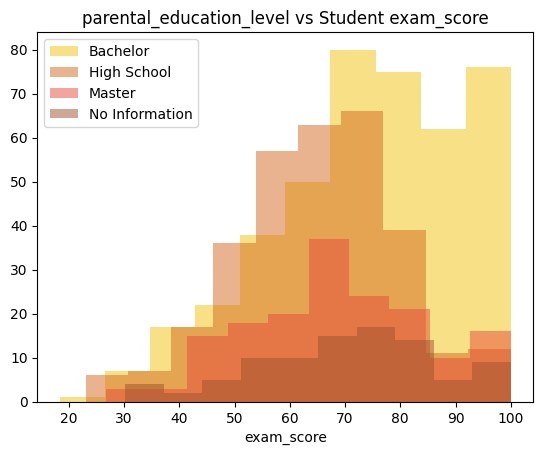

In [485]:
Bachelor = Students[Students["parental_education_level"] == "Bachelor"]["exam_score"]
High_School = Students[Students["parental_education_level"] == "High School"]["exam_score"]
Master = Students[Students["parental_education_level"] == "Master"]["exam_score"]
No_Information = Students[Students["parental_education_level"] == "No Information"]["exam_score"]

plt.hist(Bachelor, label="Bachelor", alpha=0.5, color="#f1c30f", bins=10)
plt.hist(High_School, label="High School", alpha=0.5, color="#D2691E", bins=10)
plt.hist(Master, label="Master", alpha=0.5, color="#e74c3c", bins=10)
plt.hist(No_Information, label="No Information", alpha=0.5, color="#A0522D", bins=10)

plt.legend()
plt.title("parental_education_level vs Student exam_score")
plt.xlabel("exam_score")
plt.show()

In [486]:
# Amount of Students in parental_education_level categories.

In [487]:
 Students.groupby('parental_education_level')['exam_score'].count().to_frame()

,exam_score
parental_education_level,
Bachelor,428
High School,314
Master,167
No Information,91


In [488]:
# Average of Students in parental_education_level categories.

In [373]:
 Students.groupby('parental_education_level')['exam_score'].mean().round(2).to_frame()

,exam_score
parental_education_level,
Bachelor,74.12
High School,65.19
Master,68.74
No Information,70.36


#### Conclusion: 
-  we can see that Students with Bachelor graduated parents tend to have Higher grades than Students to High school graduated parents.

#### Pie charts illustrating the Distribution of key student characteristics:
##### Gender, Diet Quality, Extracurricular Participation, and Internet Quality

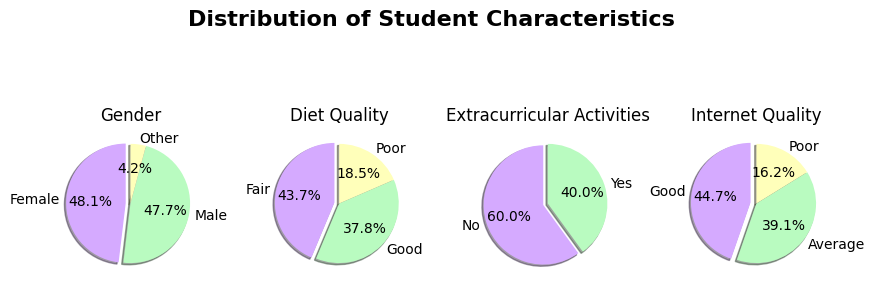

In [489]:
gender_data = Students['gender'].value_counts()
diet_quality_data = Students['diet_quality'].value_counts()
extracurricular_participation_data = Students['extracurricular_participation'].value_counts()
internet_quality_data = Students['internet_quality'].value_counts()

color_map =['#D5AAFF', '#B9FBC0', '#FFFFBA'] 

plt.figure(figsize=(10,4))
plt.suptitle("Distribution of Student Characteristics", fontsize=16, fontweight='bold')
plt.subplots_adjust(wspace=0.4)

plt.subplot(1,4,1)
plt.pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', startangle=90,explode=(0.08,0,0),shadow=True, colors = color_map )
plt.title("Gender")

plt.subplot(1,4,2)
plt.pie(diet_quality_data, labels=diet_quality_data.index, autopct='%1.1f%%', startangle=90,explode=(0.08,0,0),shadow=True,colors = color_map)
plt.title("Diet Quality")

plt.subplot(1,4,3)
plt.pie(extracurricular_participation_data, labels=extracurricular_participation_data.index, autopct='%1.1f%%', startangle=90,explode=(0.08,0),shadow=True,colors = color_map)
plt.title("Extracurricular Activities")

plt.subplot(1,4,4)
plt.pie(internet_quality_data, labels=internet_quality_data.index, autopct='%1.1f%%', startangle=90,explode=(0.1,0,0),shadow=True,colors = color_map)
plt.title("Internet Quality")
plt.show()

#### Observations:
1. **Gender** – Females lead slightly, representing 48% of the students.
2. **Diet Quality** – The majority of students report having fair diet quality (43.7%), while only 18.5% report poor diet quality.
3. **Extracurricular Activities** – Most students (60%) do not participate in extracurricular activities.
4. **Internet Quality** – A large portion of students (44.7%) report having good internet quality.

#### Barchart of Number of Students Taking Exams by Day of the Week

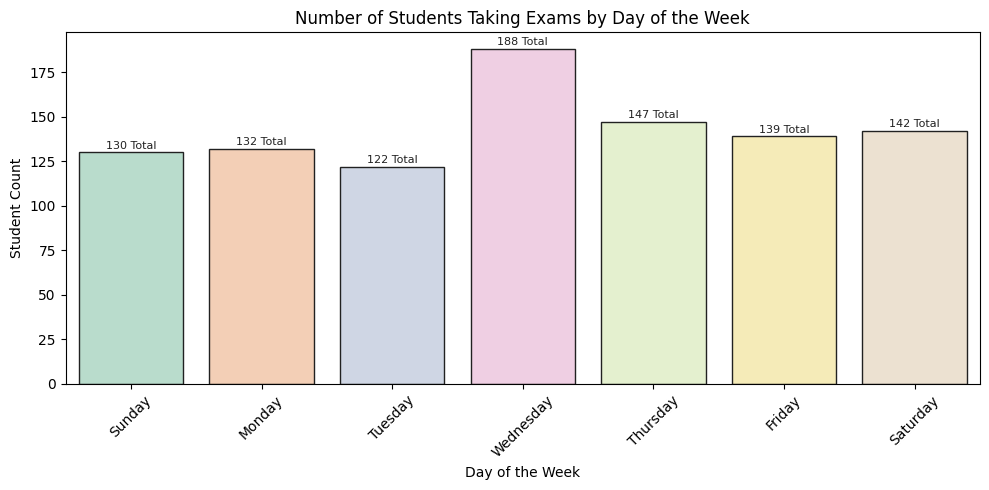

In [493]:
ordered_days = [ 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] # mapping the days of the week.
day_week_exams = Students.groupby('exam_day')['student_id'].count().reindex(ordered_days).reset_index()
day_week_exams.columns = ['exam_day', 'student_count']

plt.figure(figsize=(10, 5))
sb.barplot(data=day_week_exams, x='exam_day', y='student_count',hue ='exam_day', palette='Pastel2', edgecolor='#212121')
for i, row in day_week_exams.iterrows():# add the total to the chart
    count = row['student_count']
    plt.text(i, count + 1, f'{count} Total', ha='center', va='bottom', fontsize=8, color='#212121')

plt.title('Number of Students Taking Exams by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Student Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conclusion: 
- Wednesday is the most common exam day, with 188 students taking exams on that day.
- Tuesday has the lowest number of exams reported among the days of the week.



#### Visualization of Distribution and Trends for Sleep Hours, Study Hours, and Mental Health Ratings
##### Comparing **Top 10** and **Bottom 10** Students Based on Exam Scores



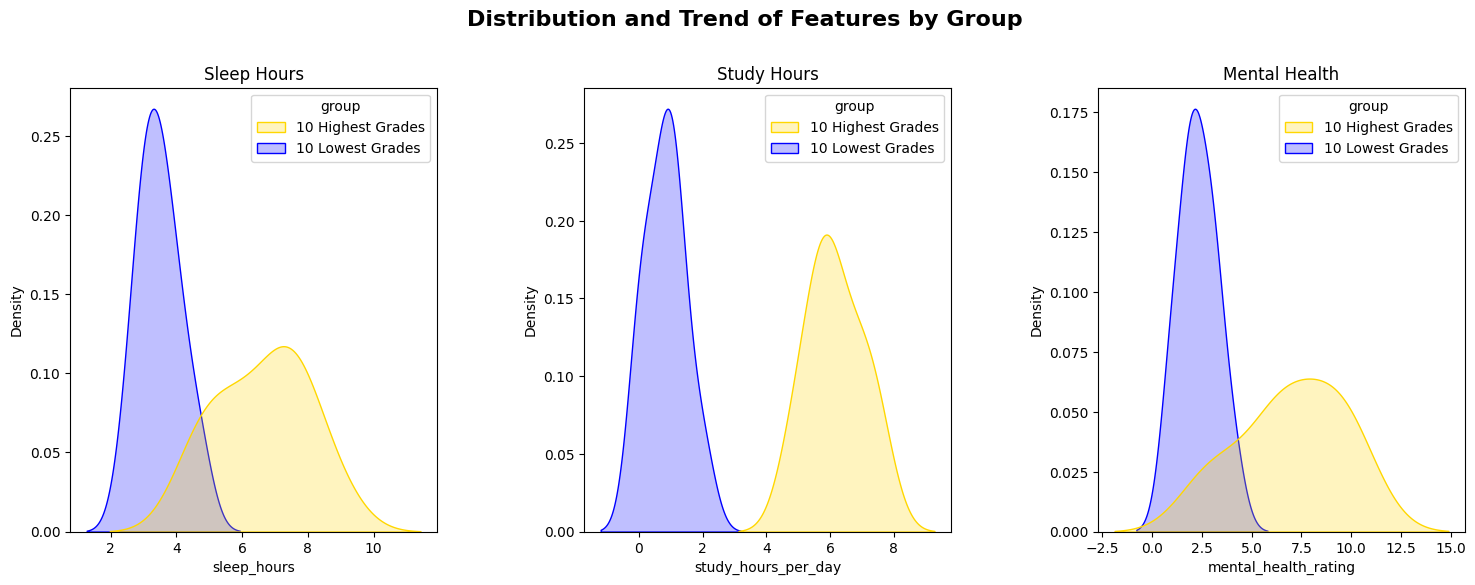

In [494]:
# selecting the top and botton 10 students
top_10_grades = Students.nlargest(10, 'exam_score').copy()
worst_10_grades = Students.nsmallest(10, 'exam_score').copy()
#creating a new column.
top_10_grades['group'] = '10 Highest Grades'
worst_10_grades['group'] = '10 Lowest Grades'
# joining the tables
comparison = pd.concat([top_10_grades, worst_10_grades])

plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.suptitle("Distribution and Trend of Features by Group", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.85, wspace=0.4)

# Sleep Hours
sb.kdeplot(data=comparison, x='sleep_hours', hue='group', fill=True, palette=['gold', 'blue'])
plt.title('Sleep Hours')

# Study Hours per Day
plt.subplot(1, 3, 2)
sb.kdeplot(data=comparison, x='study_hours_per_day', hue='group', fill=True, palette=['gold', 'blue'])
plt.title('Study Hours')

# Mental Health Rating
plt.subplot(1, 3, 3)
sb.kdeplot(data=comparison, x='mental_health_rating', hue='group', fill=True, palette=['gold', 'blue'])
plt.title('Mental Health')

plt.show()


In [496]:
#using describe to check the data collected 

In [495]:
top_10_grades.describe()

,age,exam_date,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,exam_month,exam_year
count,10.000000,10,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000
mean,20.700000,2018-05-18 07:12:00,6.160000,3.210000,1.690000,98.240000,6.620000,3.300000,7.0,100.0,6.300000,2017.900000
min,18.000000,2016-04-15 00:00:00,4.800000,1.000000,0.000000,95.400000,4.600000,0.000000,3.0,100.0,1.000000,2016.000000
25%,19.000000,2017-11-15 00:00:00,5.725000,2.925000,0.950000,97.000000,5.575000,2.250000,6.0,100.0,2.500000,2017.250000
50%,20.500000,2018-05-15 12:00:00,5.950000,3.300000,1.700000,98.400000,6.900000,3.500000,7.0,100.0,7.500000,2018.000000
75%,22.750000,2019-05-24 06:00:00,6.800000,3.700000,2.375000,99.850000,7.475000,4.750000,9.0,100.0,9.750000,2019.000000
max,24.000000,2019-10-15 00:00:00,7.600000,4.600000,3.900000,100.000000,8.800000,6.000000,10.0,100.0,11.000000,2019.000000
std,2.213594,NaN,0.883428,0.945692,1.257378,1.654086,1.387884,1.888562,2.581989,0.0,3.945462,1.197219


In [385]:
worst_10_grades.describe()

,age,exam_date,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,exam_month,exam_year,semester
count,10.000000,10,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000
mean,20.700000,2018-02-27 07:12:00,0.830000,3.160000,4.530000,34.830000,3.480000,0.800000,2.3,26.280000,7.300000,2017.600000,1.300000
min,18.000000,2016-03-10 00:00:00,0.000000,2.300000,3.000000,25.000000,2.500000,0.000000,1.0,18.400000,2.000000,2016.000000,1.000000
25%,20.000000,2017-03-25 18:00:00,0.375000,2.475000,4.025000,30.750000,3.000000,0.000000,2.0,26.325000,4.750000,2017.000000,1.000000
50%,20.500000,2018-08-21 12:00:00,0.900000,2.950000,4.350000,32.600000,3.500000,1.000000,2.0,26.800000,8.000000,2018.000000,1.000000
75%,22.000000,2018-12-22 00:00:00,1.150000,3.800000,5.250000,40.000000,3.875000,1.000000,3.0,27.900000,8.750000,2018.000000,1.750000
max,23.000000,2019-09-16 00:00:00,2.000000,4.300000,6.500000,45.600000,4.700000,2.000000,4.0,29.700000,12.000000,2019.000000,2.000000
std,1.828782,NaN,0.630784,0.766232,1.040353,6.342634,0.649444,0.788811,0.948683,3.328263,3.433495,1.074968,0.483046


#### Conclusion: 
1. Sleep hours distribution shows that top performers generally have more consistent and slightly higher sleep hours (Average of 6.6 hours) than lower performers (Average = 3.5 hours).
2. Students with the top 10 exam scores tend to have higher study hours(Average = 6.1 hours) per day compared to the bottom 10 students(Average = 0.8 hours).
3. Mental health ratings are notably better among the top 10 students(Average = 7) compared to the bottom 10 students(Average = 2.3) suggesting a positive relationship between mental well-being and academic success.



#### Correlation Between Lifestyle Factors like diet quality, sleep hours or exrecise frequency On Mental Health rating

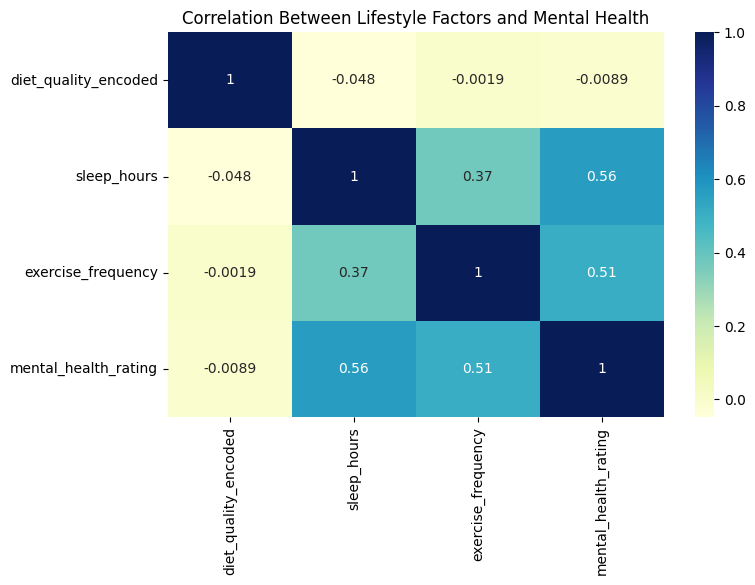

In [497]:
mental_corr_data = Students[['diet_quality', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']].copy()
# changing diet quality to numeric
mental_corr_data['diet_quality_encoded'] = mental_corr_data['diet_quality'].map({'Poor': 1,'Fair': 2,'Good': 3})

correlation_matrix = mental_corr_data[['diet_quality_encoded', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']].corr()

plt.figure(figsize=(8,5))
sb.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Between Lifestyle Factors and Mental Health')
plt.show()

#### Conclusions:
 - Sleep (r=0.56) and exercise (r=0.51) show moderate positive correlation with mental health.
 - Better sleep and frequent exercise are linked to improved well-being.
 - Diet quality has no clear correlation (r≈0), suggesting minimal impact in this dataset.


# Final Conclution & Insights :
- Students with part-time jobs tend to have lower average exam scores (Average = 66) compared to those who do not work (Average = 71.7).

- Students participating in extracurricular activities tend to have higher Average exam scores (Average = 72.8) than those who do not participate (Average = 68.2).

- Female students aged 17-22 generally have higher average grades (Average = 70.8) than their male peers (Average = 68.8) on the other hand Male students aged 23-24 tend to have higher average grades (Average =72) than females of the same age (Average = 68.7).

- August (106) and April (101) are the peak months for exams, showing almost equal participation of males and females.

- June (59) and February (63) have the lowest exam activity records.

- Wednesday is the most common exam day, with 188 students taking exams on that day.

- The majority of Students in the dataset are students whose parents have a Bachelor’s degree (428 Students out of 1000 in the dataset) tend to achieve higher grades (Average = 74.1) than those whose parents completed only high school (314 Students with Average = 65.1).

#### According to Sampled Data : Top 10 exam scores & Bottom 10 exam scores

- Students who sleep more (Average = 6.6 hours) tend to achieve better grades than those with fewer sleep hours(Average = 3.5 hours).

- Students who study more hours (Average = 6.1 hours) per day have a higher chance of obtaining good exam scores.

- Better mental health ratings (Average = 7) are associated with higher chances of achieving better exam grades.

### Summary Recommendation:
#### To improve academic performance, students should prioritize better sleep, consistent study habits, participate in extracurriculars,
#### and maintain good mental health and physical activity.


#  Future Improvements Recommendations:

 - Collect more date data such as hours or semesters to validate trends.
 - Include additional variables such as stress levels, nutrition details, and sleep quality (not just duration).
 - Collect Student University information such as name,program, country for an analysis based on those fields. 


### Thank you for reading my project!
### I hope you found the Conclutions you were searching for.